<a href="https://colab.research.google.com/github/adrenalinovaya/RL/blob/main/A2C_%D0%B4%D0%B7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torch==1.13.1 --extra-index-url https://download.pytorch.org/whl/cpu

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cpu
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.1/199.1 MB 5.2 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.4.0+cu121
    Uninstalling torch-2.4.0+cu121:
      Successfully uninstalled torch-2.4.0+cu121
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.4.0+cu121 requires torch==2.4.0, but you have torch 1.13.1+cpu which is incompatible.
torchvision 0.19.0+cu121 requires torch==2.4.0, but you have torch 1.13.1+cpu which is incompatible.


In [1]:
# @title установка библиотек
!pip install rarfile --quiet
!pip install stable-baselines3[extra] --quiet
!pip install ale-py --quiet
!pip install gym[box2d] --quiet
!pip install pyvirtualdisplay --quiet
!pip install pyglet --quiet
!pip install pygame --quiet
!pip install minigrid --quiet
!pip install -q swig --quiet
!pip install -q gymnasium[box2d] --quiet
!pip install 'minigrid<=2.1.1' --quiet
!pip3 install box2d-py --quiet


# @title установка драйверов
!apt-get update > /dev/null 2>&1
!apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1
!apt-get install -y swig build-essential python-dev python3-dev > /dev/null 2>&1
!apt-get install x11-utils > /dev/null 2>&1
!apt-get install xvfb > /dev/null 2>&1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.7/434.7 kB 6.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 23.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.3/182.3 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 58.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 52.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 53.7 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel 

In [57]:
!pip install TensorFlow==v2.16.1

  Using cached tensorflow-2.16.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 77.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 95.5 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.0
    Uninstalling ml-dtypes-0.4.0:
      Successfully uninstalled ml-dtypes-0.4.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.0
    Uninstalling tensorboard-2.17.0:
      Successfully uninstalled tensorboard-2.17.0
  Attempting uninstall: TensorFlow
    Found existing installation: tensorflow 2.17.0
    Uninstalling tensorflow-2.17.0:
      Successfully uninstalled tensorflow-2.17.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the fol

In [ ]:
import random
import numpy as np
import gymnasium as gym
import torch
import torch.nn as nn
from torch.nn import functional as F

from tqdm import tqdm

In [ ]:
import torch.optim as optim

In [ ]:
class OrnsteinUhlenbeckActionNoise:
    def __init__(self, mu, sigma, theta=.15, dt=1e-2, x0=None):
        self.theta = theta
        self.mu = mu
        self.sigma = sigma
        self.dt = dt
        self.x0 = x0
        self.reset()

    def __call__(self):
        x = self.x_prev + self.theta * (self.mu - self.x_prev) * self.dt + self.sigma * np.sqrt(self.dt) * np.random.normal(size=self.mu.shape)
        self.x_prev = x
        return x

    def reset(self):
        self.x_prev = self.x0 if self.x0 is not None else np.zeros_like(self.mu)

ou_action_noise = OrnsteinUhlenbeckActionNoise(mu=np.zeros(1), sigma=np.ones(1) * 0.05)

In [ ]:
import copy
import random
from collections import deque, namedtuple

import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

"""
Hyperparameters:

actor_layer_sizes
critic_layer_sizes
max_buffer_size
tau
max_time_steps
max_episodes
actor_lr
critic_lr
GAMMA
update_after
batch_size
"""

device = torch.device("cpu")
dtype = torch.double

Transition = namedtuple(
    "Transition", ("state", "action", "reward", "next_state", "done")
)


class agent:
    def __init__(
        self,
        env,
        actor_layer_sizes=[32, 32],
        critic_layer_sizes=[64, 64],
        max_buffer_size=1000000,
    ):
        self.env = env
        (
            self.actor,
            self.critic,
            self.target_actor,
            self.target_critic,
        ) = self.make_models(actor_layer_sizes, critic_layer_sizes)
        self.replay_buffer = deque(maxlen=max_buffer_size)
        self.max_buffer_size = max_buffer_size

    def make_models(self, actor_layer_sizes, critic_layer_sizes):
        actor = (
            nn.Sequential(
                nn.Linear(
                    self.env.observation_space.shape[0],
                    actor_layer_sizes[0],
                ),
                nn.ReLU(),
                nn.Linear(actor_layer_sizes[0], actor_layer_sizes[1]),
                nn.ReLU(),
                nn.Linear(
                    actor_layer_sizes[1], self.env.action_space.shape[0]
                ), nn.Tanh()
            )
            .to(device)
            .to(dtype)
        )

        critic = (
            nn.Sequential(
                nn.Linear(
                    self.env.observation_space.shape[0]
                    + self.env.action_space.shape[0],
                    critic_layer_sizes[0],
                ),
                nn.ReLU(),
                nn.Linear(critic_layer_sizes[0], critic_layer_sizes[1]),
                nn.Linear(critic_layer_sizes[1], 1),
            )
            .to(device)
            .to(dtype)
        )

        target_actor = copy.deepcopy(actor)    # Create a target actor network

        target_critic = copy.deepcopy(critic)   # Create a target critic network

        return actor, critic, target_actor, target_critic

    def select_action(self, state, noise_factor):         # Selects an action in exploratory manner
      with torch.no_grad():
        noisy_action = self.actor(state) + noise_factor * torch.randn(size = self.env.action_space.shape, device=device, dtype=dtype)
        action = torch.clamp(noisy_action, self.env.action_space.low[0], self.env.action_space.high[0])

        return action

    def store_transition(self, state, action, reward, next_state, done):             # Stores the transition to the replay buffer with a default maximum capacity of 2500
        if len(self.replay_buffer) < self.max_buffer_size:
            self.replay_buffer.append(
                Transition(state, action, reward, next_state, done)
            )
        else:
            self.replay_buffer.popleft()
            self.replay_buffer.append(
                Transition(state, action, reward, next_state, done)
            )

    def sample_batch(self, batch_size=128):                                            # Samples a random batch of transitions for training
      return Transition(
            *[torch.cat(i) for i in [*zip(*random.sample(self.replay_buffer, min(len(self.replay_buffer), batch_size)))]]
        )


    def train(
        self,
        GAMMA=0.99,
        actor_lr=0.001,
        critic_lr=0.001,
        tau=0.001,
        max_time_steps=5000,
        max_episodes=200,
        update_after=1,
        batch_size=64,
        noise_factor=np.random.normal() #0.2,
    ):

        self.train_rewards_list = []
        actor_optimizer = optim.Adam(self.actor.parameters(), lr=actor_lr)
        critic_optimizer = optim.Adam(
            self.critic.parameters(), lr=critic_lr
        )
        print("Starting Training:\n")
        for e in range(max_episodes):
            state = self.env.reset()
            state = torch.tensor(state, device=device, dtype=dtype).unsqueeze(0)
            episode_reward = 0
            for t in range(max_time_steps):
                #self.env.render()
                action = self.select_action(state, noise_factor)
                next_state, reward, done, _ = self.env.step(action[0])         # Sample a transition
                episode_reward += reward

                next_state = torch.tensor(next_state, device=device, dtype=dtype).unsqueeze(0)
                reward = torch.tensor(
                    [reward], device=device, dtype=dtype
                ).unsqueeze(0)
                done = torch.tensor(
                    [done], device=device, dtype=dtype
                ).unsqueeze(0)

                self.store_transition(
                    state, action, reward, next_state, done
                )                # Store the transition in the replay buffer

                state = next_state

                sample_batch = self.sample_batch(64)

                with torch.no_grad():                 # Determine the target for the critic to train on
                  target = sample_batch.reward + (1 - sample_batch.done) * GAMMA * self.target_critic(torch.cat((sample_batch.next_state, self.target_actor(sample_batch.next_state)), dim=1))

                # Train the critic on the sampled batch
                critic_loss = nn.MSELoss()(
                    target,
                    self.critic(
                        torch.cat(
                            (sample_batch.state, sample_batch.action), dim=1
                        )
                    ),
                )

                critic_optimizer.zero_grad()
                critic_loss.backward()
                critic_optimizer.step()

                actor_loss = -1 * torch.mean(
                  self.critic(torch.cat((sample_batch.state, self.actor(sample_batch.state)), dim=1))
                  )

                #Train the actor
                actor_optimizer.zero_grad()
                actor_loss.backward()
                actor_optimizer.step()


                #if (((t + 1) % update_after) == 0):
                for actor_param, target_actor_param in zip(self.actor.parameters(), self.target_actor.parameters()):
                  target_actor_param.data = tau * actor_param.data + (1 - tau) * target_actor_param.data

                for critic_param, target_critic_param in zip(self.critic.parameters(), self.target_critic.parameters()):
                  target_critic_param.data = tau * critic_param.data + (1 - tau) * target_critic_param.data

                if done:
                    print(
                        "Completed episode {}/{}".format(
                            e + 1, max_episodes
                        )
                    )
                    break

            self.train_rewards_list.append(episode_reward)

        self.env.close()
        print(self.train_rewards_list)

    def plot(self, plot_type):
        if (plot_type == "train"):
            plt.plot(self.train_rewards_list)
            plt.show()
        elif (plot_type == "test"):
            plt.plot(self.test_rewards_list)
            plt.show()
        else:
            print("\nInvalid plot type")

Starting Training:



/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Completed episode 1/250
Completed episode 2/250
Completed episode 3/250
Completed episode 4/250
Completed episode 5/250
Completed episode 6/250
Completed episode 7/250
Completed episode 8/250
Completed episode 9/250
Completed episode 10/250
Completed episode 11/250
Completed episode 12/250
Completed episode 13/250
Completed episode 14/250
Completed episode 15/250
Completed episode 16/250
Completed episode 17/250
Completed episode 18/250
Completed episode 19/250
Completed episode 20/250
Completed episode 21/250
Completed episode 22/250
Completed episode 23/250
Completed episode 24/250
Completed episode 25/250
Completed episode 26/250
Completed episode 27/250
Completed episode 28/250
Completed episode 29/250
Completed episode 30/250
Completed episode 31/250
Completed episode 32/250
Completed episode 33/250
Completed episode 34/250
Completed episode 35/250
Completed episode 36/250
Completed episode 37/250
Completed episode 38/250
Completed episode 39/250
Completed episode 40/250
Completed

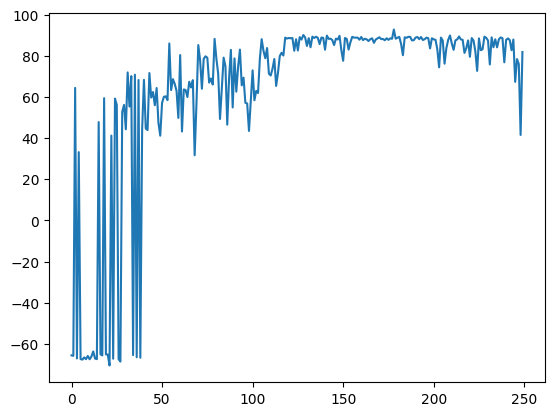

In [ ]:
import gym

env = gym.make("MountainCarContinuous-v0")

myagent = agent(env)
myagent.train(max_episodes=250)
myagent.plot("train")

In [11]:
from stable_baselines3 import DDPG
from stable_baselines3.common.env_util import make_vec_env
import os
import time
import numpy as np
from stable_baselines3.ddpg.policies import MlpPolicy
from stable_baselines3.common.noise import NormalActionNoise, OrnsteinUhlenbeckActionNoise


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
# Saving logs to visulise in Tensorboard, saving models
models_dir = f"models/Mountain-{time.time()}"
logdir = f"logs/Mountain-{time.time()}"

if not os.path.exists(models_dir):
    os.makedirs(models_dir)

if not os.path.exists(logdir):
    os.makedirs(logdir)

In [17]:
env = make_vec_env("MountainCarContinuous-v0", n_envs=1)
n_actions = env.action_space.shape[-1]
action_noise = OrnsteinUhlenbeckActionNoise(mean=np.zeros(n_actions), sigma=float(0.5) * np.ones(n_actions))
param_noise = None


model = DDPG(MlpPolicy, env, verbose=1, action_noise=action_noise)

Using cpu device


In [18]:
#Training and saving models along the way
TIMESTEPS = 20000
for i in range(10):
    model.learn(total_timesteps=TIMESTEPS, reset_num_timesteps=False, tb_log_name="DDPG")
    model.save(f"{models_dir}/{TIMESTEPS*i}")

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 999      |
|    ep_rew_mean     | -35.6    |
| time/              |          |
|    episodes        | 4        |
|    fps             | 37       |
|    time_elapsed    | 107      |
|    total_timesteps | 3996     |
| train/             |          |
|    actor_loss      | 0.0087   |
|    critic_loss     | 1.72e-06 |
|    learning_rate   | 0.001    |
|    n_updates       | 3895     |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 999      |
|    ep_rew_mean     | -37.5    |
| time/              |          |
|    episodes        | 8        |
|    fps             | 36       |
|    time_elapsed    | 218      |
|    total_timesteps | 7992     |
| train/             |          |
|    actor_loss      | 0.00661  |
|    critic_loss     | 1.37e-06 |
|    learning_rate   | 0.001    |
|    n_updates       | 7891     |
--------------

KeyboardInterrupt: 

In [69]:
models_dir = "models/Mountain-1726248189.0127406"
model_path = f"{models_dir}/40000"
best_model = DDPG.load(model_path, env=env)

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [ ]:
best_model.

In [21]:
from tqdm import tqdm

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [26]:
# Check model performance
# load the best model you observed from tensorboard - the one reach the goal/ obtaining highest return
models_dir = "models/Mountain-1726248189.0127406"
model_path = f"{models_dir}/40000"
best_model = DDPG.load(model_path, env=env)


obs = env.reset()

reward_records = []

for i in tqdm(range(5)):
  cum_reward = 0
  while True:
          action, _states = best_model.predict(obs)
          obs, rewards, dones, info = env.step(action)
          cum_reward += rewards
          env.render()
  reward_records.append(cum_reward)
  if np.average(reward_records[-2]) > 90:
        break

obs = env.reset()
while True:
    action, _states = best_model.predict(obs)
    obs, rewards, dones, info = env.step(action)
    env.render()

  0%|          | 0/5 [07:10<?, ?it/s]


KeyboardInterrupt: 

In [37]:
batch_size = 250

reward_records = []
for i in tqdm(range(20)):
    # Run episode till done
    s = env.reset()
    done = False
    cum_reward = 0
    while not done:
      #  a = pick_sample(s)

        # a = pick_sample(s,0,)
        # s_next, r, done, _ = env.step(a)
        # buffer.add([s, a, r, s_next, float(done)])
        # cum_reward += r


        action, _states = best_model.predict(obs)
        obs, rewards, dones, info = env.step(action)
        cum_reward += rewards


    # Output total rewards in episode (max 500)
    # print("Run episode{} with rewards {}".format(i, cum_reward), end="\r")
    reward_records.append(cum_reward)

    # stop if reward mean > 475.0
    if np.average(reward_records[-20:]) > 90:
        break

print("\nDone")

  0%|          | 0/20 [01:43<?, ?it/s]


KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt
# Generate recent 50 interval average
average_reward = []
for idx in range(len(reward_records)):
    avg_list = np.empty(shape=(1,), dtype=int)
    if idx < 50:
        avg_list = reward_records[:idx+1]
    else:
        avg_list = reward_records[idx-49:idx+1]
    average_reward.append(np.average(avg_list))
plt.plot(reward_records, label='reward')
plt.plot(average_reward, label='average reward')
plt.xlabel('N steps')
plt.ylabel('Reward')
plt.legend()
plt.show()

In [ ]:
batch_size = 250

reward_records = []
for i in tqdm(range(2000)):
    # Run episode till done
    s = env.reset()
    done = False
    cum_reward = 0
    while not done:
      #  a = pick_sample(s)

        a = pick_sample(s,0,)
        s_next, r, done, _ = env.step(a)
        buffer.add([s, a, r, s_next, float(done)])
        cum_reward += r




        # Train (optimize parameters)
        if buffer.length() >= batch_size:
            states, actions, rewards, n_states, dones = buffer.sample(batch_size)
            optimize(states, actions, rewards, n_states, dones)
            update_target()
        s = s_next

    # Output total rewards in episode (max 500)
    # print("Run episode{} with rewards {}".format(i, cum_reward), end="\r")
    reward_records.append(cum_reward)

    # stop if reward mean > 475.0
    if np.average(reward_records[-50:]) > 475.0:
        break

print("\nDone")


In [ ]:
 for e in range(max_episodes):
            state = self.env.reset()
            state = torch.tensor(state, device=device, dtype=dtype).unsqueeze(0)
            episode_reward = 0
            for t in range(max_time_steps):
                #self.env.render()
                action = self.select_action(state, noise_factor)
                next_state, reward, done, _ = self.env.step(action[0])         # Sample a transition
                episode_reward += reward

                next_state = torch.tensor(next_state, device=device, dtype=dtype).unsqueeze(0)
                reward = torch.tensor(
                    [reward], device=device, dtype=dtype
                ).unsqueeze(0)
                done = torch.tensor(
                    [done], device=device, dtype=dtype
                ).unsqueeze(0)

                self.store_transition(
                    state, action, reward, next_state, done
                )                # Store the transition in the replay buffer

                state = next_state

                sample_batch = self.sample_batch(64)
